# ECSE 415 - Assignment 2
## Caelan Marks - 260744278

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load images
img1 = cv2.imread("frame1.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 

img2 = cv2.imread("frame2.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 

## 3.1 Multi-resolution Lucas-Kanade optic flow detection

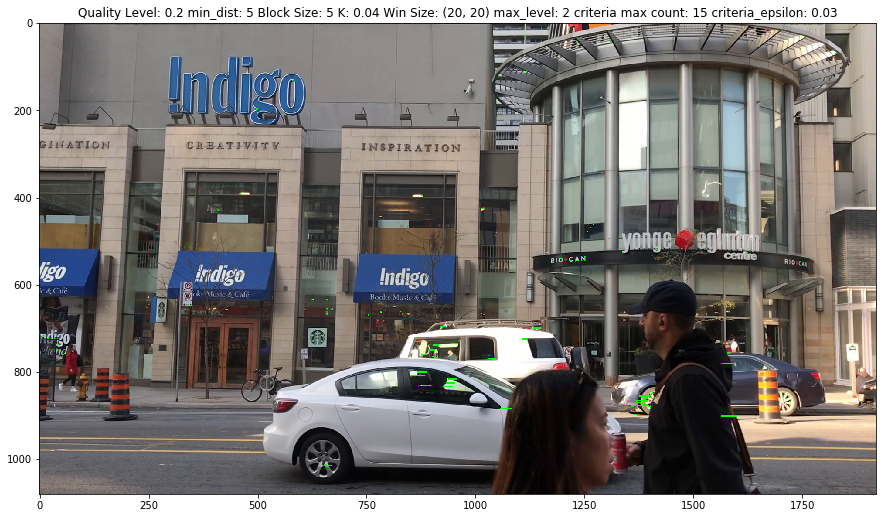

In [4]:
# Lists of values tested
# quality_level_list = [0.2, 0.3, 0.4]
# min_dist_list = [5, 7, 9]
# block_size_list = [5, 7, 9]
# k_list = [0.03, 0.04, 0.05]
# win_size_list = [(10, 10), (15, 15), (20, 20)]
# max_level_list = [1, 2, 3]
# criteria_max_count_list = [5, 10, 15]
# criteria_epsilon_list = [0.02, 0.03, 0.04]

# List good values to use
quality_level_list = [0.2]
min_dist_list = [5]
block_size_list = [5]
k_list = [0.04]
win_size_list = [(20, 20)]
max_level_list = [2]
criteria_max_count_list = [15]
criteria_epsilon_list = [0.03]

# Loop through all the lists of values
for quality_level in quality_level_list:
    for min_dist in min_dist_list:
        for block_size in block_size_list:
            for k in k_list:
                for win_size in win_size_list:
                    for max_level in max_level_list:
                        for criteria_max_count in criteria_max_count_list:
                            for criteria_epsilon in criteria_epsilon_list:
                                
                                # parameters for ShiTomasi corner detection
                                feature_params = dict( maxCorners = 500,
                                                       qualityLevel = quality_level,
                                                       minDistance = min_dist,
                                                       blockSize = block_size,
                                                       useHarrisDetector = True,
                                                       k = k)

                                # parameters for lucas kanade optical flow
                                lk_params = dict( winSize = win_size,
                                                  maxLevel = max_level,
                                                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                                             criteria_max_count, criteria_epsilon))

                                # find good corners in the first image
                                p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)

                                # calculate optical flow
                                p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)

                                # select good points
                                good_new = p1[st==1]
                                good_old = p0[st==1]

                                # Use green lines for maximum contrast and visibility
                                color = [0, 255, 0]

                                # create a mask image for drawing purposes
                                mask = img1.copy()

                                # draw the tracks
                                for i, (new, old) in enumerate(zip(good_new, good_old)):
                                    a, b = new.ravel()
                                    c, d = old.ravel()
                                    mask = cv2.line(mask, (a,b), (c,d), color, 2)

                                # display images
                                plt.figure(figsize=(15,15))
                                plt.imshow(mask)
                                plt.title("Quality Level: " + str(quality_level) + " min_dist: " +str(min_dist) + " Block Size: "
                                          + str(block_size) + " K: " + str(k) + " Win Size: " + str(win_size)
                                          + " max_level: " + str(max_level) + " criteria max count: " + str(criteria_max_count)
                                          + " criteria_epsilon: " + str(criteria_epsilon))
                                plt.show()

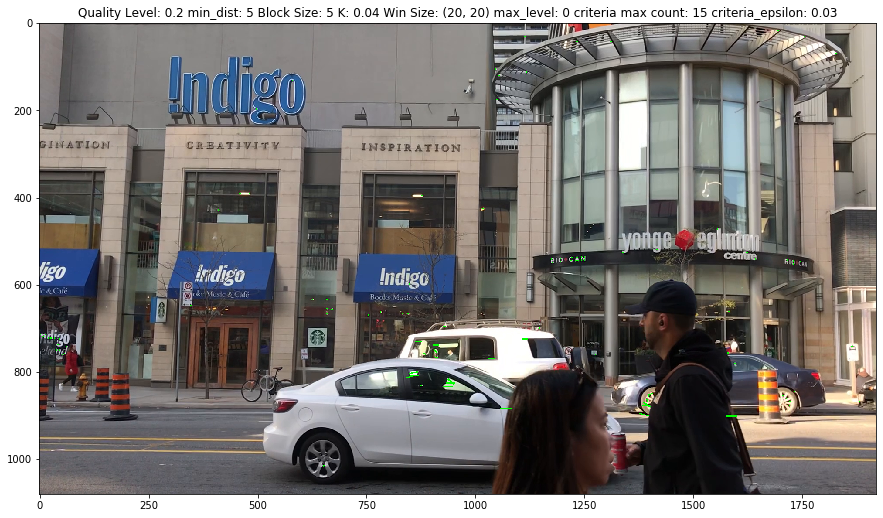

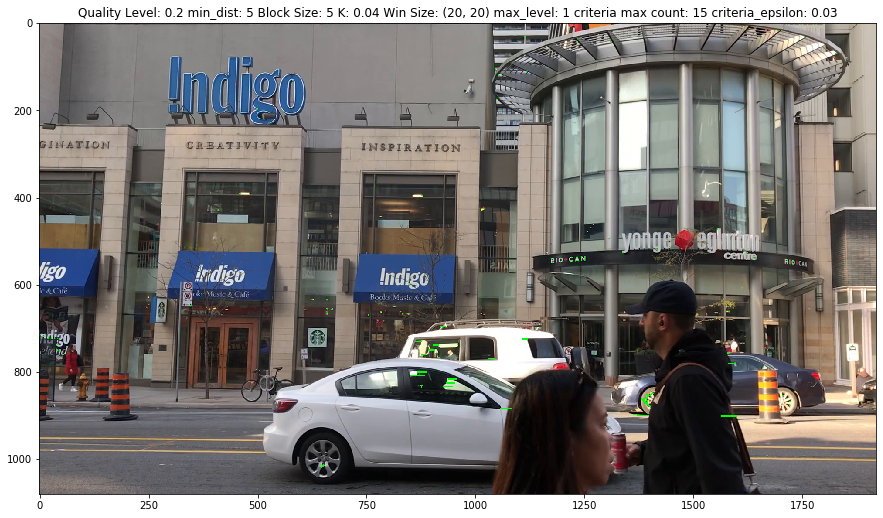

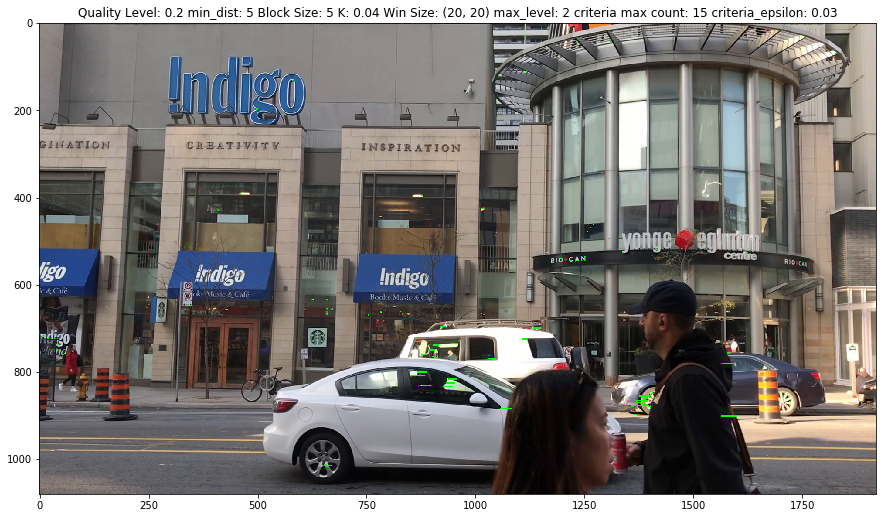

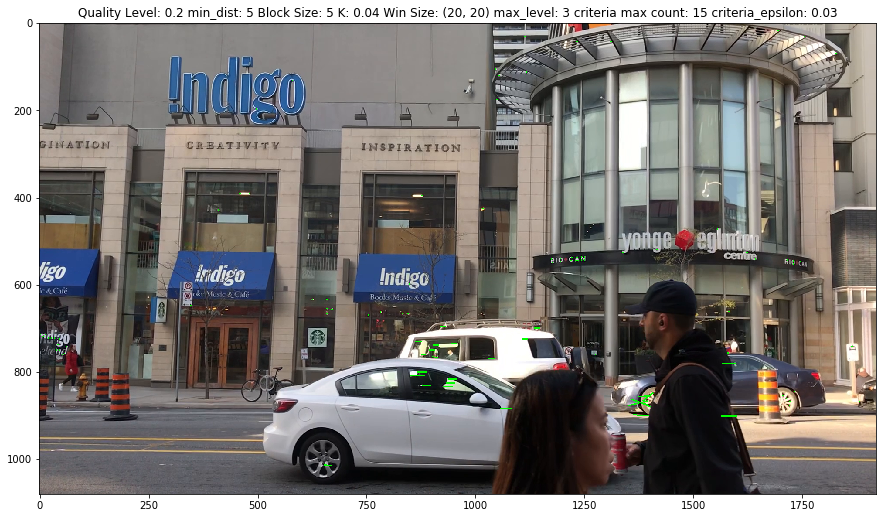

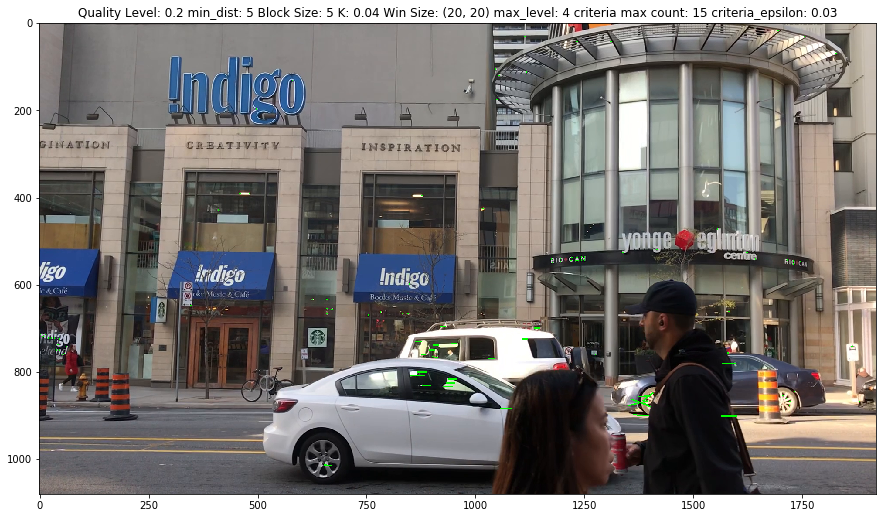

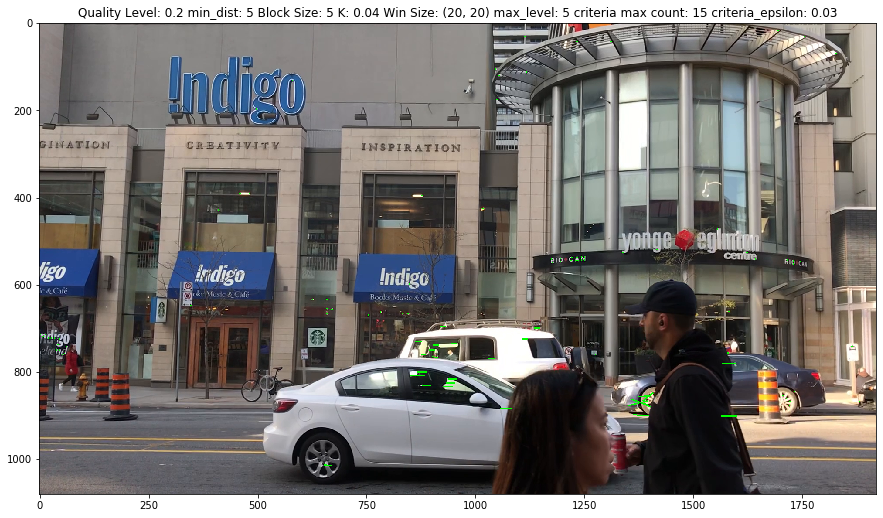

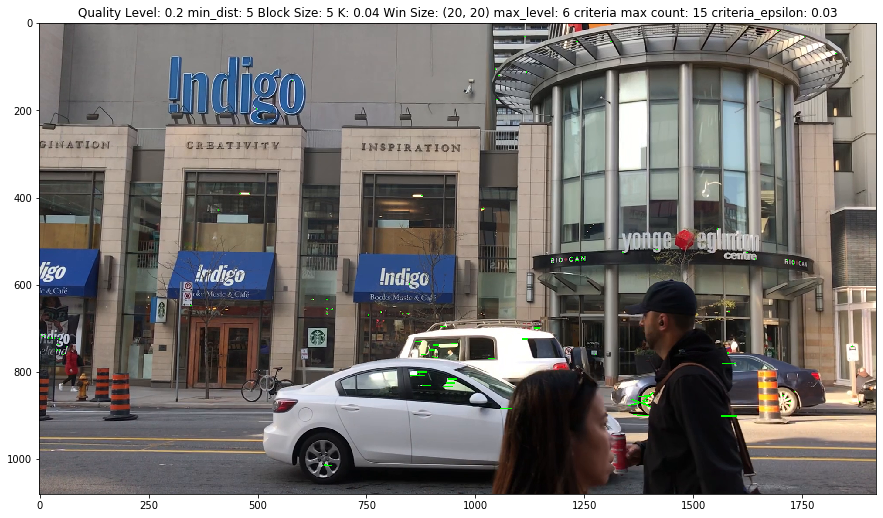

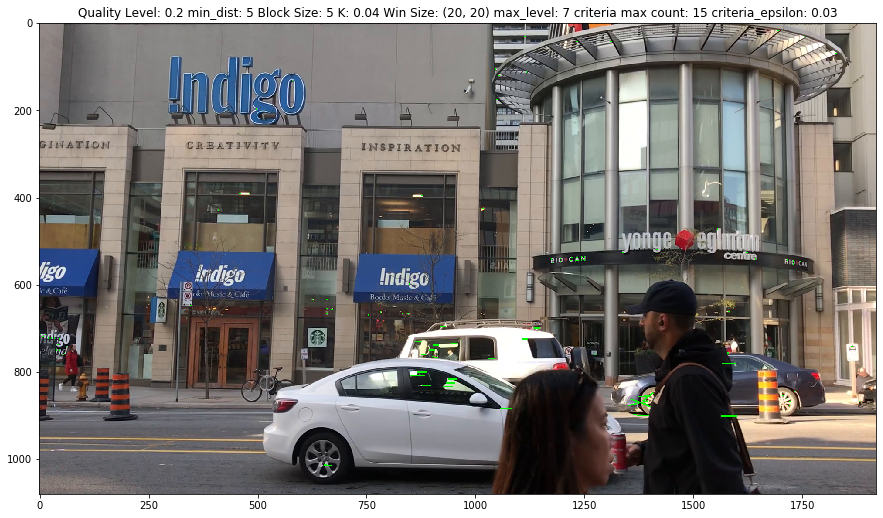

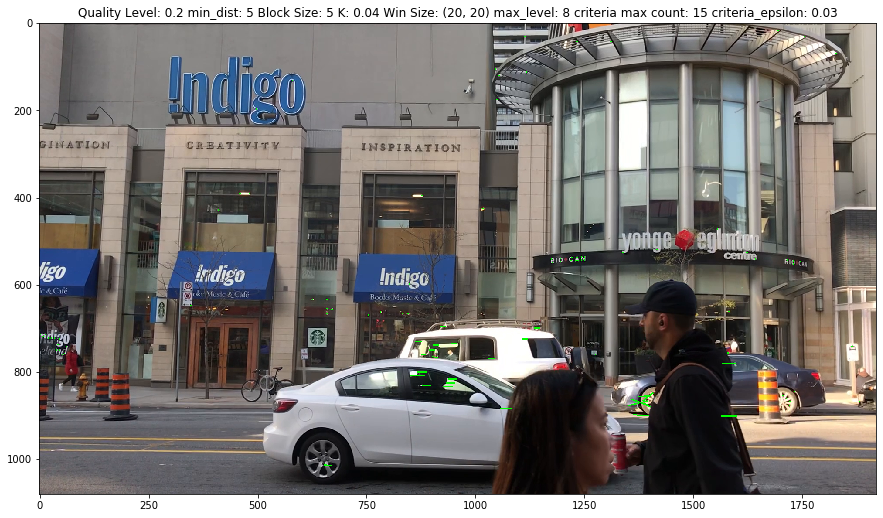

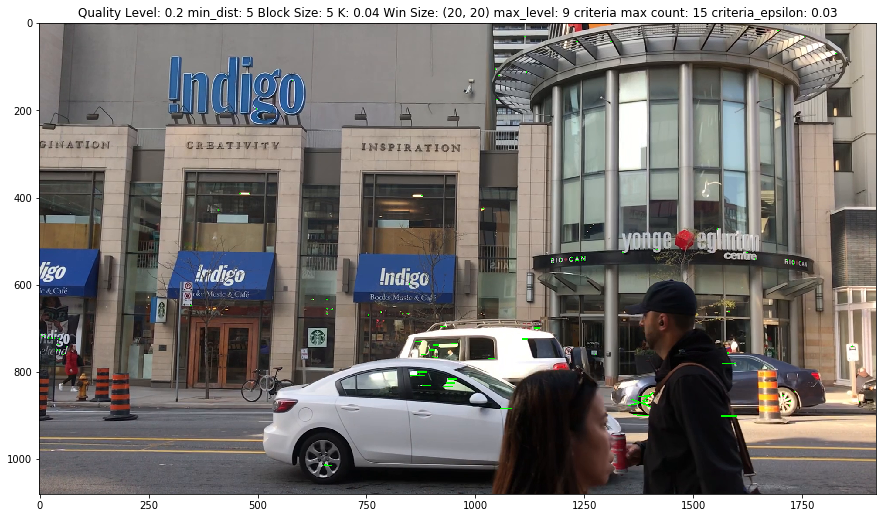

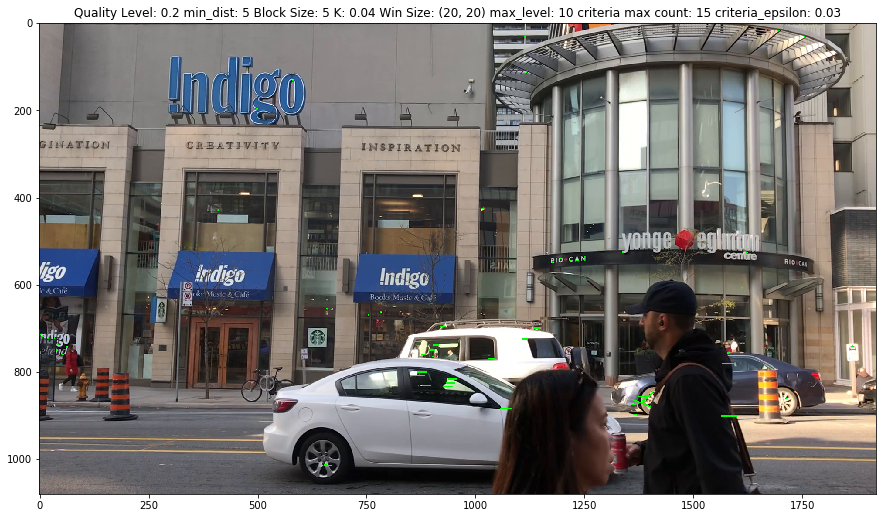

In [7]:
# Create list of values to go over
quality_level_list = [0.2]
min_dist_list = [5]
block_size_list = [5]
k_list = [0.04]
win_size_list = [(20, 20)]
max_level_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
criteria_max_count_list = [15]
criteria_epsilon_list = [0.03]

# Create list of error
err_list = []

# Loop over all parameter lists
for quality_level in quality_level_list:
    for min_dist in min_dist_list:
        for block_size in block_size_list:
            for k in k_list:
                for win_size in win_size_list:
                    for max_level in max_level_list:
                        for criteria_max_count in criteria_max_count_list:
                            for criteria_epsilon in criteria_epsilon_list:
                                
                                # parameters for ShiTomasi corner detection
                                feature_params = dict( maxCorners = 500,
                                                       qualityLevel = quality_level,
                                                       minDistance = min_dist,
                                                       blockSize = block_size,
                                                       useHarrisDetector = True,
                                                       k = k)

                                # parameters for lucas kanade optical flow
                                lk_params = dict( winSize = win_size,
                                                  maxLevel = max_level,
                                                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                                             criteria_max_count, criteria_epsilon))

                                # find good corners in the first image
                                p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params)

                                # calculate optical flow
                                p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)

                                # Save the error
                                err_list.append(np.mean(err))

                                # select good points
                                good_new = p1[st==1]
                                good_old = p0[st==1]

                                # Use green lines for maximum contrast and visibility
                                color = [0, 255, 0]

                                # create a mask image for drawing purposes
                                mask = img1.copy()

                                # draw the tracks
                                for i, (new, old) in enumerate(zip(good_new, good_old)):
                                    a, b = new.ravel()
                                    c, d = old.ravel()
                                    mask = cv2.line(mask, (a,b), (c,d), color, 2)

                                # display images
                                plt.figure(figsize=(15,15))
                                plt.imshow(mask)
                                plt.title("Quality Level: " + str(quality_level) + " min_dist: " +str(min_dist) + " Block Size: "
                                          + str(block_size) + " K: " + str(k) + " Win Size: " + str(win_size)
                                          + " max_level: " + str(max_level) + " criteria max count: " + str(criteria_max_count)
                                          + " criteria_epsilon: " + str(criteria_epsilon))
                                plt.show()

Adding extra levels to the algorithm seems to increase the accuracy after two additional levels but after these first couple levels, there is almost no difference between the results. This is expected as the error seems to remain constant after two levels as seen in the plotted figure below.

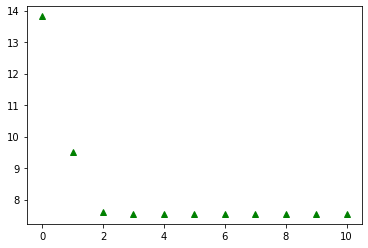

In [8]:
t = np.arange(0., 11., 1.)

# Plot the error as a function of the depth
plt.plot(t, err_list, 'g^')
plt.show()

From the firgure above it can be seen that as the max levels increases, the mean error decreases. After two levels though, there is no added improvement by having extra levels.